We learned to work with `vectorized R` functions. These functions allowed us to efficiently perform operations on all elements of a vector.

For example, the `mean()` function takes a vector as input and calculates the average of its values.

`mean(1:10)`

`5.5`

Some of the functions we wrote ourself can also be called on `vectors`. For example, we wrote the following function to calculate the percentage of total goals scored in each match in the 2014 World Cup:

`percentage_of_total <- function(x) {
  x/sum(x) * 100
}`

Not all functions in R can be applied to all elements of a vector at once, though. For example, let's consider this function, containing an if-else statement for conditional execution,

`percentage_no_na <- function(x,y) {
  if(x + y > 0) {
    xy_total = x + y 
    (x/xy_total) * 100
  } else {
    0
  }
}`


If we try to apply the function to two vectors as input x and y arguments:

`percentage_no_na(x = scores$home_goals, y = scores$away_goals)`

We'll receive a warning message:

`Warning message:
In if (x + y > 0) { :
  the condition has length > 1 and only the first element will be used`

This function is not vectorized — we need to repeatedly execute it on rows of the `scores` data frame.

We could do this using a for-loop:

`percentage_home <- c()`

`for (i in 1:nrow(scores)) {  
  if(scores$home_goals[i] + scores$away_goals[i] > 0) {
    percentage_home <- c(percentage_home, (scores$home_goals[i]/(scores$home_goals[i] + scores$away_goals[i]) * 100))
  } else {
    percentage_home <- c(percentage_home, 0)
  }
}`

Using a for-loop is not necessarily a bad choice here, but if we look at the code, it isn't very easy to see what's going on.

As an alternative to for-loops, we could use R's [functionals](http://adv-r.had.co.nz/Functionals.html). Functionals are a special kind of function. They take a function and a list or vector of data and apply it as inputs and return a list or vector as output:

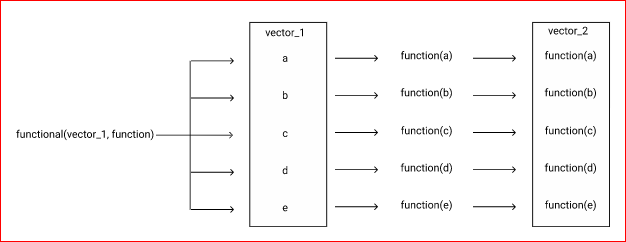

Functionals eliminate the need for for-loops in many situations by allowing us to apply any function to all elements of a list or vector.

In this file, we'll learn to work with functionals to replace for-loops in a number of data manipulation scenarios using the functions we wrote in the last file as we analyzed FiveThirtyEight's [data](https://www.kaggle.com/fivethirtyeight/world-cup) on the [2014 FIFA World Cup](https://en.wikipedia.org/wiki/2014_FIFA_World_Cup).

Let's import the World Cup data into R using `read_csv()` and save it as a data frame named `scores`.

`library(readr)
scores <- read_csv("scores.csv")`

Base R includes a family of functionals, known as the `"apply"` family, that allow us to apply functions to elements of an object. However, there are some aspects of the apply functions that can make them somewhat cumbersome to work with:

* The user interface syntax is inconsistent among the different functionals in the apply family.
* The apply functionals output data in inconsistent formats, which can be confusing.

Instead, in this file, we'll focus on teaching tools for using functionals from a relatively recent addition to the tidyverse: The `purrr` package. The functionals in the `purrr` package can be used for the same purposes as the apply family of functionals, and their consistency in syntax and output makes them easier to use and allows for more legible code.

Let's install and load the package:

`install.packages("purrr")
 library(purrr)`

We'll begin by introducing the `purrr` functional `map()`, which takes a vector or list, applies a single-variable function to its elements, and returns a list.

So we can clearly envision how `map()` works, we'll create the following short list containing home and away team goals for the first five matches of the 2014 World Cup:


`match_results <- list(c(3,1), c(1,0), c(1,5), c(3,1), c(3,0))`

`names(match_results) <- c("match 1", "match 2", "match 3", "match 4", "match 5")`

Here's what the list looks like:

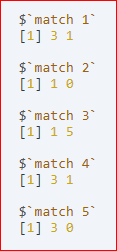

Let's calculate the total goals scored in each match by applying the `sum()` function to each match in the list `match_results`.

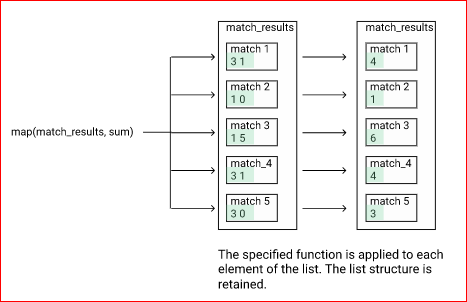

To use the `map()` functional for this task, we would include the list or vector of data (`match_results`) and the function (`sum`) as arguments:

`map(match_results, sum)`

The code above returns a list of total goals for each match:

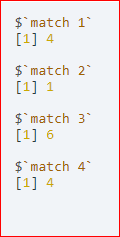

It's important to note the list returned as output contains the same structure and names as the original list. This is a feature of functions in the `purrr` package that makes it a good choice for writing clear, intuitive code.

**Task**

Calculate the lowest score (using the `min()` function) in each match in the `match_result`s list using the `map()` functional.

**Answer**

`min_scores <-  map(match_results, min)`

We've now seen how to use the `map()` functional to apply a built-in function to a list. We can use functionals to apply any function to elements of a list or data frame.

Earlier, we wrote a function to calculate the proportion of 2014 World Cup goals that were scored during each match:


`proportion_of_total <- function(x) {
  x/sum(x)
}`

We then applied the function to two variables in scores:

`proportion_of_total(scores$home_goals)
 proportion_of_total(scores$away_goals)`

As an alternative to writing out the two expressions, we could use the `map()` functional to apply the `proportion_of_total()` function to multiple variables of the `scores` data frame.

We can make use of functions for manipulating data frames in the `dplyr` package and functionals from the `purrr` package to write efficient code.

For example, if we wanted to apply the `proportion_of_total()` function to the `home_goals` and `away_goals` variables in the `scores` data frame, we could use `select()` to choose the variables we wanted to work with and `map()` to apply the function to them:

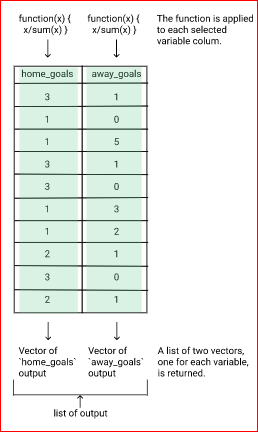

We would need to load the dplyr and purrr libraries, and we could write:

`library(dplyr)
library(purrr)`

`scores %>% select(home_goals, away_goals) %>% map(proportion_of_total)`
  
The `map()` functional applies the `proportion_of_total()` function to each element of the `scores` data frame — the `home_goals` and `away_goals` variable vectors. The result is a list of output vectors for each variable (recall that map`()` always returns a list):

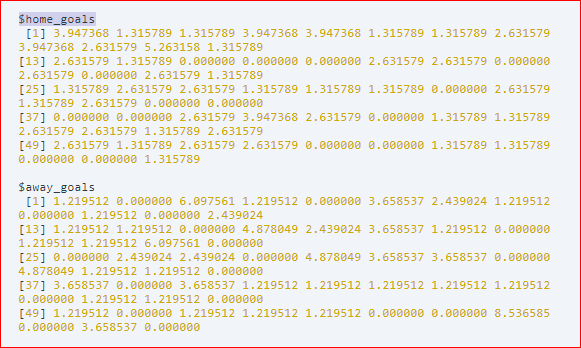

Although we were only applying the function to two variables in the `scores` data frame in this case, this approach would scale well for applying a single-variable function to a much larger list of variables.

**Task**

Use `map()` to apply the `percentage_of_total()` function to the two variables

**Answer**

`percentage_of_total <- function(x) {
  x/sum(x) * 100
}`

`per_goals_output <- scores %>% select(home_goals, away_goals) %>% map(percentage_of_total)`

We've seen that the `map()` functional always returns a list, and that it retains the names and structure of its inputs. This consistency is helpful for writing organized, predictable code.

In the previous example, when we used `map()` to apply the `percentage_of_total` function to two variables, we wanted to return a list of two vectors.

Sometimes, however, we'll want to specify output of a different type. For example, maybe we want to calculate the total goals in each match and return a vector instead of a list so we can add it to a data frame as a new variable.

The `purrr` package contains the following variants of the `map()` functional, which allow us to return a vector consisting of output of the specified data type:

* `map_lgl()` returns a logical vector
* `map_int()` returns an integer vector
* `map_dbl()` returns a double vector
* `map_chr()` returns a character vector

Remember that in R, integer and double data types are subsets of the numeric data type.

If we use the `map_dbl()` functional to apply the `sum()` function to the `match_results` list

`map_dbl(match_results, sum)`

The result is a vector of double values with the name attributes retained:

`match 1 match 2 match 3 match 4 match 5 
      4       1       6       4       3`

Let's see what happens if we use the `map_chr()` functional to apply the function `sum()` to all elements of the `match_results` list.

`match_results <- list(c(3,1), c(1,0), c(1,5), c(3,1), c(3,0))
 names(match_results) <- c("match 1", "match 2", "match 3", "match 4", "match 5")`

`sum_chr <- map_chr(match_results,sum)
typeof(sum_chr)`

`[1] "character"`

The `map()` functional can be used to apply any single-variable function to elements of a vector or list. But what about functions with more than one variable?

When applying a function with two variable inputs, we'll need to use a different functional from the `purrr` package: `map2()`.

The `map2()` functional takes two variables and a function as arguments and returns a list:

Syntax for `map2()` is somewhat different from syntax for `map()`, since there are two variables that must be specified before the function:

`map2(variable_1, variable_2, function)`

`proportion_no_na <- function(x,y) {
  if(x + y > 0) {
  xy_totals = x + y 
  (x / xy_total) 
  } else {
    0
  }
}`

To apply the `proportion_no_na` function to calculate the proportion of each match's total goals scored by the home team, we would list the `x` variable (`home_goals`), the `y` variable (`away_goals`), and the function.

`map2(scores$home_goals, scores$away_goals, proportion_no_na)`

We will not use the pipe operator in this situation since we need to call `map2()` on multiple arguments and therefore cannot pass function output from left to right.

Like `map()`, `map2()` always returns a list. Here are the first five lines of the resulting list of output:

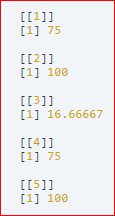

Now, let's use `map2()` to apply the `percentage_no_na` function to variables in the `scores` data frame.

`percentage_no_na <- function(x,y) {
  if(x + y > 0) {
    xy_total = x + y 
    (x/xy_total) * 100
  } else {
     0
  }
}`

`percent_goals_home <- map2(scores$home_goals, scores$away_goals, percentage_no_na)`

As we learned earlier, there are variants of `map()` that are used to return a vector of a specific data type. The `purrr` package contains the same variants for `map2()`:

* `map2_lgl()` returns a logical vector
* `map2_int()` returns an integer vector
* `map2_dbl()` returns a double vector
* `map2_chr()` returns a character vector

Let's use `map2_dbl` to create a new variable containing the percentage of total goals scored by the home team for each match.

`percentage_no_na <- function(x,y) {
  if(x+y > 0) {
    total_goals = x+y 
    (x/total_goals) * 100
  } else {
    0
  }
}`

`scores_2 <- scores %>% mutate(percent_goals_home = map2_dbl(scores$home_goals, scores$away_goals,percentage_no_na))`

In the last file, we wrote a multivariable function to subtract one goal from `home_goals` for the first twenty matches of the 2014 World Cup and add one goal to `away_goals` for the remainder of the matches.

`adjust_yz <- function(x,y,z) {
  if (x <= 20) {
    y - 1 
  } else {
    z + 1
  }
}`

How would we apply this function to the scores data frame? The `purrr` package contains a functional for working with functions with any number of variables as arguments: `pmap()`.

Working with the `pmap()` functional is somewhat different from working with `map()` and `map_2()` because function arguments are provided as a list. The syntax for using `pmap()` to apply a function to multiple elements looks like:

`pmap(list_of_arguments, function)`

As it does for `map()` and `map2()`, `purrr` includes variants of `pmap()` that return vectors of specific types:

* `pmap_lgl()` returns a logical vector
* `pmap_int()` returns an integer vector
* `pmap_dbl()` returns a double vector
* `pmap_chr()` returns a character vector

We may wonder why we wouldn't use the `pmap()` functional all the time instead of `map()` and `map2()`. The answer is that, because it is optimized to work with more computationally intensive functions, `pmap()` is slower than `map()` and `map2()`. This will make a difference when we begin working with larger data sets.

Let's use `pmap_dbl()` to apply the `adjust_yz` function to the scores data frame and return a numeric vector.

`args_list <- list(x = scores$match_id, y = scores$home_goals, z = scores$away_goals)`

Although we do not need to specify the variable letters in the list, this is helpful for keeping track of the function arguments.

Next, we'd use the `pmap_dbl()` functional to apply the `adjust_yz` function to the list of arguments:

`pmap_dbl(args_list, adjust_yz)`

The output is a vector of double data:

`2  1 -4  2  3 -2 -1  1  3  1  4 -1  1  0  0 -4 -2 -1  2  0  2  0  2  1  1  2  2  1  1  1  0  2  1  2  0  0  0  0  2  3  2  0  1  1  2  2  1  2  2  1  2  2  0  0  1  1  0  0  1`

Let's use `pmap()` to apply `adjust_yz_2` to the scores data frame.

`adjust_yz_2 <- function(x,y,z) {
  if (x >= 5 & x <= 10) {
    y * 2 
  } else {
    z - 1
  }
}`

`adjusted_scores <- pmap_dbl(list(scores$match_id,scores$home_goals,scores$away_goals), adjust_yz_2)`

In this file, we've learned to use functionals to take the place of for-loops.